In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

1. Escriba la ecuación de difusión para el tiempo  en coordenadas esféricas y asuma que  ya que por simetría esférica sólo dependerá de la posición radial respecto al centro de la gotica (Usar LaTex)

$$\nabla^2\tau=-\frac{6\pi\eta a}{k_B T}$$
$$\nabla^2\tau=\frac{1}{r^2} \frac{\partial}{\partial_r}(r^2 \frac{\partial_t}{\partial_r})+ \frac{1}{r^2 \sin\theta}\frac{\partial}{\partial_\theta}(\sin\theta \frac{\partial_t}{\partial_\theta})+\frac{1}{r^2 \sin\theta}(\frac{\partial^2 t}{\partial \varphi^2})$$
$$\nabla^2\tau=\frac{1}{r^2} \frac{\partial}{\partial_r}(r^2 \frac{\partial_t}{\partial_r})+0+0$$
$$\frac{1}{r^2} \frac{\partial}{\partial_r}(r^2 \frac{\partial_t}{\partial_r})=-\frac{6\pi\eta a}{k_B T}$$
$$\frac{1}{r^2}[(2r\frac{\partial_t}{\partial_r}+r^2 \frac{\partial_t^2}{\partial_r^2})]=-\frac{6\pi\eta a}{k_B T}$$
$$\frac{\partial_t^2}{\partial_r^2}+\frac{2\partial_t}{r\partial_r}=-\frac{6\pi\eta a}{k_B T}$$
$$\frac{\partial_t^2}{\partial_r^2}+\frac{2\partial_t}{r\partial_r}+\frac{6\pi\eta a}{k_B T}=0$$


2. Resuelva la ecuación diferencial para el tiempo de forma numérica y grafique

In [2]:
E = 1*10**(-3)*(10**5)
A = 1*10**(-7)
D = (4.05*10**(-21))/(6*np.pi*E*A)
R = 5*10**(-6)
N = 200
dr = (R)/(N)

In [3]:
c0 = 0
cN = 0
r = np.arange(0, R, dr)

In [4]:
f = np.matrix([np.array([(r[i]-dr if j == i-1 and i > 0 else 0)for j in range(N)])for i in range(N) ]) # primera fila
f = f + np.matrix([np.array([(-2*r[i] if j == i else 0)for j in range(N)])for i in range(N) ]) # primera fila
f = f + np.matrix([np.array([(r[i]+dr if j == i+1 and i < N-1 else 0)for j in range(N)])for i in range(N) ]) # última fila

f[0,:] = np.zeros(N)
f[0,0] = 1
f[0,1] = -1
f[-1, -1] = 1


In [5]:
c = (-r*(dr**2)/D)
c[0] = c0
c[-1] = cN
c = np.matrix(c).T

In [6]:
Tau = np.array((np.linalg.inv(f)*c).T).flatten()
r1 = np.arange(0,5,5/N)

Text(0, 0.5, 'Tau')

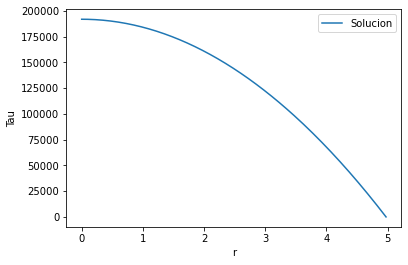

In [7]:
plt.plot(r1, Tau, label="Solucion")
plt.legend()
plt.xlabel("r")
plt.ylabel("Tau")

3. Si los viriones están distribuidos uniformemente, encuentre el tiempo que tardaría un virión en salir de la gota de aerosol.

In [8]:
V = (4/3)*np.pi*(R**3)

In [9]:
T = sp.integrate.simpson(4*np.pi*Tau*(r**2)/V, r)

In [10]:
print (T)

75650.1968281572


4. Las cadenas de Markov.

In [ ]:
N = 100
dx = R/N

x = np.arange(0,R,dx)
dt = 1e-4
t = np.arange(0,T,dt)

alpha = D*dt/dx**2

assert alpha < 1/12

print('Resumen:'
     f'\n  alpha={alpha}'
     f'\n  dx={dx}'
     f'\n  dt={dt}')

In [ ]:
def actualiza_objetos(n):
    global alpha
    # esta funcion me dice de n objetos cuantos van a la izquierda y cuantos a la derecha
    v = np.random.uniform(size=n)
    izq = sum(v<alpha)
    der = sum(v<2*alpha) - izq
    return (izq,der)

def actualiza_phi(phi):
    # calcular cuantos se van a la derecha y cuantos a la izquierda
    dphi = np.array([actualiza_objetos(_phi) for _phi in phi]).T
    # verificar cuantos hay.... reajustar cuantos se van: condiciones de frontera
    dphi[0,0] = 0
    dphi[1,-1] = 0
    # sumar los q tenia phi0 + los q llegan - los q se van
    dphi_izq = np.roll(dphi[0],-1)
    dphi_der = np.roll(dphi[1], 1)
    dphi = np.sum(dphi, axis=0)
    return phi-dphi+dphi_izq+dphi_der

In [ ]:
phi = np.zeros(N, dtype=np.uint32)
# condiciones iniciales
phi[0] = N*dx
phi[N//2] = 15
plt.scatter(x, phi)

In [ ]:
phi = np.zeros(N, dtype=np.uint32)
# condiciones iniciales
phi[0] = N*dx
phi[N//-400] = 15
plt.scatter(x, phi)

In [ ]:
phi = np.zeros(N, dtype=np.uint32)
# condiciones iniciales
phi[0] = N*dx
phi[N//400] = 15
plt.scatter(x, phi)

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, L))
ax.set_ylim((0, max(phi)))
ax.set_ylim(auto=True, ymin=0, ymax=max(phi))

line, = ax.plot([], [], 'o', lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    global phi
    phi = actualiza_phi(phi)
    line.set_data(x, phi)
    return (line,)

### call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=40, blit=True)

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='jshtml')
rc
tohtml = anim.to_jshtml()
plt.clf()

HTML(tohtml)